In [159]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## function to generate table of identity and frequency

In [160]:
def generate_id_per(pwd):
    df = pd.read_csv(pwd,header=None)
    df = df.reset_index()
    df[1] = df[0].astype("int")
    #df2 = df.drop_duplicates(1,keep='last')
    length = len(df)
    #df2["Frequency"]= df2["index"]/length
    #df2.columns = ['index', "Indentity", 1, 'Frequency']
    #df3 = df2[["Indentity","Frequency"]]

    df[2] = df[0].astype("int")
    dftt= pd.DataFrame(df.groupby(2).size())
    dftt = dftt.reset_index()
    dftt.columns = ["identity","count"]
    dftt["frequency"] = dftt["count"]/dftt["count"].sum()
    return dftt

#generate_id_per("3300003785_____Ga0007851_100001_mappped_per.txt")
#df2["int_per"] = df2["Indentity"].astype("int")
#df2#.groupby("int_per").size()

## for loop to plot all genomes

In [161]:
mapped_per_files = !ls *_mappped_per.txt
mapped_per_files = mapped_per_files[1:]


Text(0,0.5,'Frequency')

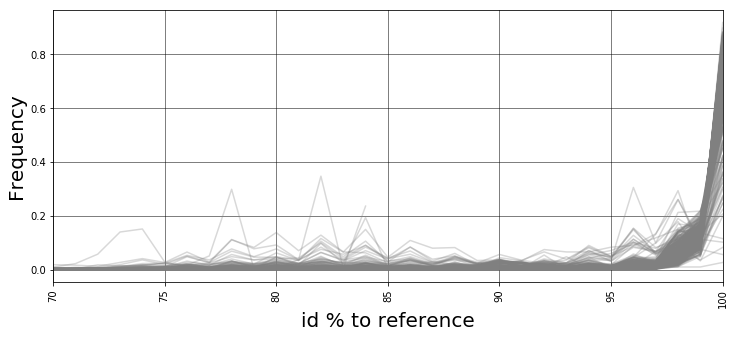

In [162]:
plt.figure(figsize=(12,5))
Per_99_all = []
Per_95_all = []

for i in mapped_per_files:
    dftt = generate_id_per(i)
    Per_99 = dftt[dftt["identity"] >= 99]["frequency"].sum()
    Per_99 = "%.4f" % Per_99
    Per_99_all.append(Per_99) ## Pecentage of reads mapped at >= 99% id

    Per_95 = dftt[dftt["identity"] >= 95]["frequency"].sum()
    Per_95 = "%.4f" % Per_95
    Per_95_all.append(Per_95) ## Pecentage of reads mapped at >= 95% id
    #sns.lmplot(x="Indentity", y="Frequency",data=df3)
    plt.plot(dftt["identity"], dftt["frequency"],color="grey",alpha=0.3)

plt.xticks(rotation=90)
plt.xlim([70,100])
plt.grid(color='black', linestyle='-', linewidth=1,alpha=0.5)
plt.xlabel("id % to reference",fontsize=20)
plt.ylabel("Frequency",fontsize=20)   

## generate table for all info

In [163]:
df_info = pd.DataFrame(mapped_per_files,columns=["Genome"])

df_info["Genome"] = df_info["Genome"].str.split("_mapp",expand=True)[0]
df_info["Pecentage of reads mapped at >= 95% id"] = Per_95_all
df_info["Pecentage of reads mapped at >= 95% id"] = df_info["Pecentage of reads mapped at >= 95% id"].astype("float") * 100

df_info["Pecentage of reads mapped at >= 99% id"] = Per_99_all
df_info["Pecentage of reads mapped at >= 99% id"] = df_info["Pecentage of reads mapped at >= 99% id"].astype("float") * 100

df_info.head()

,Genome,Pecentage of reads mapped at >= 95% id,Pecentage of reads mapped at >= 99% id
0,3300001097_____JGIcombinedJ13537_10000434,91.44,73.92
1,3300001798_____JGI24126J20157_1000438,97.88,93.60
2,3300002091_____JGI24028J26656_1000152,85.59,70.74
3,3300002091_____JGI24028J26656_1000154,96.48,87.14
4,3300002091_____JGI24028J26656_1000301,97.45,90.44


## Get SNP density and length

In [164]:
SNP_vcf = !ls *_SNP.vcf
SNP_vcf = SNP_vcf[1:]
all_SNP_density = []
all_genome_len = []

In [165]:
for i in SNP_vcf:
    df = pd.read_csv(i,sep="\t",skiprows=22)
    df_SNP = df[df["ALT"].str.contains(",<\*>")]

    df_SNP["SNP_rate"] = df_SNP.iloc[:,-1].str.split(":",expand=True)[1]
    df_SNP_2 = df_SNP[["POS","REF","ALT","SNP_rate"]]

    ## del first and last value
    df_SNP_2["SNP_rate_2"] = df_SNP_2["SNP_rate"].str.rstrip(',0').str.replace(r'^[0-9]+,', '')#.str.contains(",")

    ## max change of base for each position
    max_i = len(df_SNP_2["SNP_rate"].str.split(",",expand=True).columns) - 2
    max_i = np.arange(max_i)

    ## number of changes for each position
    SNP_rate = df_SNP_2["SNP_rate_2"].str.split(",",expand=True)

    ## show rows as long as one change number >= 4
    x = SNP_rate[0].astype("float") >= 4
    for i in max_i[1:]:
        x = x | (SNP_rate[i].astype("float") >= 4)
    
    SNP_4 = df_SNP_2[x]
    total_SNPs = len(SNP_4)
    length_genome = df["POS"].nlargest(1)
    SNP_density = total_SNPs/int(length_genome/1000)
    
    all_SNP_density.append(SNP_density)
    all_genome_len.append(int(length_genome))



/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


## merge two table

In [166]:
#all_genome_len = [int(a) for a in all_genome_len]
#len(all_genome_len)
dft = pd.DataFrame(SNP_vcf,columns=["Genome"])
dft["Length (bp)"] = all_genome_len
dft["SNP density (SNP/kb)"] = all_SNP_density
dft["SNP density (SNP/kb)"] = dft["SNP density (SNP/kb)"].round(2)
dft["Genome"] = dft["Genome"].str.replace("_SNP.vcf","")

df_info2 = pd.merge(dft,df_info,left_on="Genome",right_on="Genome")
df_info2.head()

,Genome,Length (bp),SNP density (SNP/kb),Pecentage of reads mapped at >= 95% id,Pecentage of reads mapped at >= 99% id
0,3300001097_____JGIcombinedJ13537_10000434,19117,4.26,91.44,73.92
1,3300001798_____JGI24126J20157_1000438,15931,0.07,97.88,93.60
2,3300002091_____JGI24028J26656_1000152,29218,15.31,85.59,70.74
3,3300002091_____JGI24028J26656_1000154,29963,3.31,96.48,87.14
4,3300002091_____JGI24028J26656_1000301,17518,0.00,97.45,90.44


## sort bed files for coverage

In [187]:
bed_files = !ls *.bed
bed_files = bed_files[1:]
all_mean_cov = []

In [188]:
for i in bed_files:
    mean_cov = pd.read_csv(i,sep="\t",header=None)[2].mean()
    all_mean_cov.append(mean_cov)


In [189]:
dft2 = pd.DataFrame(bed_files,columns=["Genome"])
dft2["Total Coverage (x)"] = all_mean_cov

In [194]:
dft2["Genome"] = dft2["Genome"].str.split("_mapped_",expand=True)[0]

In [217]:
dft3 = pd.merge(df_info2,dft2,left_on="Genome",right_on="Genome")
dft3["taxon_oid"] = dft3["Genome"].str.split("_",expand=True)[0]
dft3.head()

,Genome,Length (bp),SNP density (SNP/kb),Pecentage of reads mapped at >= 95% id,Pecentage of reads mapped at >= 99% id,Total Coverage (x),taxon_oid
0,3300001097_____JGIcombinedJ13537_10000434,19117,4.26,91.44,73.92,20.959787,3300001097
1,3300001798_____JGI24126J20157_1000438,15931,0.07,97.88,93.60,154.296215,3300001798
2,3300002091_____JGI24028J26656_1000152,29218,15.31,85.59,70.74,61.607810,3300002091
3,3300002091_____JGI24028J26656_1000154,29963,3.31,96.48,87.14,416.908153,3300002091
4,3300002091_____JGI24028J26656_1000301,17518,0.00,97.45,90.44,82.446055,3300002091


In [227]:
meta_info = pd.read_csv("../ID_metagenome_jamo.csv")
meta_info2 = meta_info[["taxon_oid","Ecosystem Type","Habitat"]]
meta_info2["taxon_oid"] = meta_info2["taxon_oid"].astype("str")
dft3["taxon_oid"] = dft3["taxon_oid"].astype("str")
df_final = pd.merge(dft3,meta_info2,left_on="taxon_oid",right_on="taxon_oid",how="left")
df_final["Ecosystem Type"].unique()
df_final.to_csv("cov_snp_mapped_per.csv")


/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


## plot cov against SNP

In [316]:
#colors =['#E41A1C','#974661','#4A72A6','#3E8E93','#48A462','#5D995D','#7E6E85','#A35390','#D16948','#FF7F00','#FFB716','#FFF02D','#E1C62F','#B97B2A','#B75F49','#DB728C','#EC83BA','#C28EA9','#999999']

from matplotlib.colors import rgb2hex
colors = [rgb2hex(a) for a in sns.color_palette("Paired",12)]

#colors = sns.color_palette("Paired",12)
colors2 = colors[:12]

colors3 = dict(zip(list(df_final["Ecosystem Type"].unique()),colors[:12]))

df_col = pd.DataFrame(colors2,df_final["Ecosystem Type"].unique(),columns=["colors"])
df_final_col = pd.merge(df_final,df_col,left_on="Ecosystem Type",right_index=True,how="left")

Text(0,0.5,'SNP density (SNP/kb)')

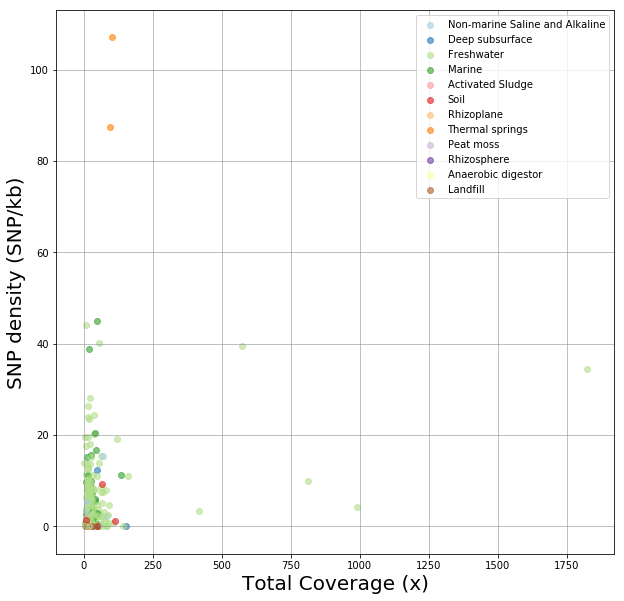

In [317]:
plt.figure(figsize=(10,10))

for i in np.arange(len(df_final_col)):
    scatter = plt.scatter(x=df_final_col.loc[i,"Total Coverage (x)"],y=df_final_col.loc[i,"SNP density (SNP/kb)"],alpha=0.6,c=df_final_col.loc[i,"colors"],label=df_final_col.loc[i,"Ecosystem Type"])
#leg_index = df_final_col.drop_duplicates("colors").index


from collections import OrderedDict

handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())

plt.grid(color='grey', linestyle='-', linewidth=1,alpha=0.5)
plt.xlabel("Total Coverage (x)",fontsize=20)
plt.ylabel("SNP density (SNP/kb)",fontsize=20)

In [320]:
df_final_col[df_final_col["Ecosystem Type"] == "Thermal springs"]

,Genome,Length (bp),SNP density (SNP/kb),Pecentage of reads mapped at >= 95% id,Pecentage of reads mapped at >= 99% id,Total Coverage (x),taxon_oid,Ecosystem Type,Habitat,colors
57,3300005861_____Ga0080006_1175989,13840,87.46,62.05,25.08,95.269147,3300005861,Thermal springs,Hypersaline mat,#ff7f00
58,3300005861_____Ga0080006_1218239,12701,107.08,47.00,13.12,103.940713,3300005861,Thermal springs,Hypersaline mat,#ff7f00
